# 📊 Task 3 – Customer Churn Prediction (Bank Customers)

## 🎯 Objective

Predict which customers are likely to **churn (leave the bank)** based on features like demographics and account activity. This helps banks take proactive measures to retain valuable clients.

We will:
- Clean and prepare the dataset
- Encode categorical variables
- Train and evaluate classification models
- Analyze feature importance

## 1. Clean and prepare the dataset

We will:
- Load the dataset
- Drop irrelevant columns
- Check for null values
- Explore data distributions

In [2]:
# Load required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Load dataset

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print('Shape: ', df.shape)

Shape:  (10000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset contains no null values. Although, it does contain some unnecessary columns. We will now remove these columns.

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's now visualize the data to understand the distributions of values in different columns.

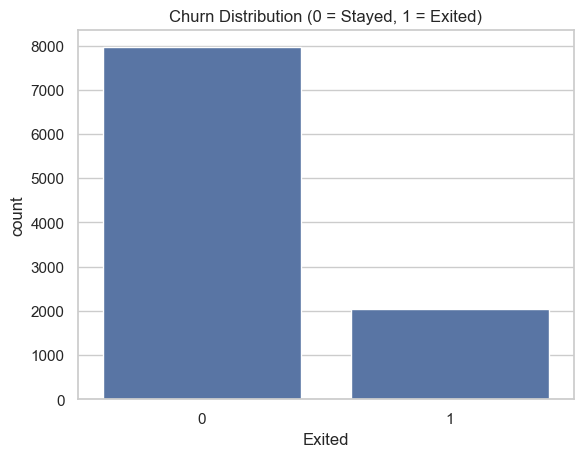

In [7]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution (0 = Stayed, 1 = Exited)")
plt.show()

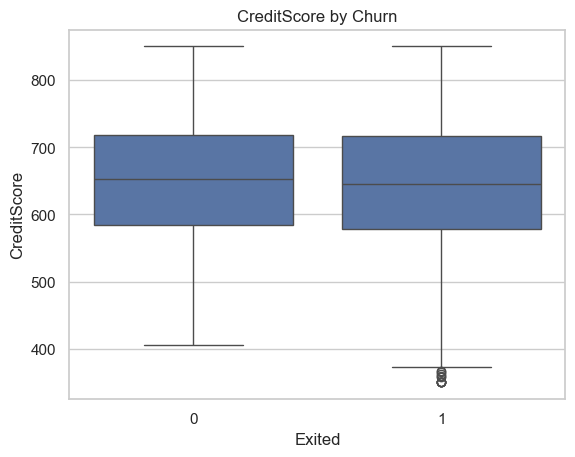

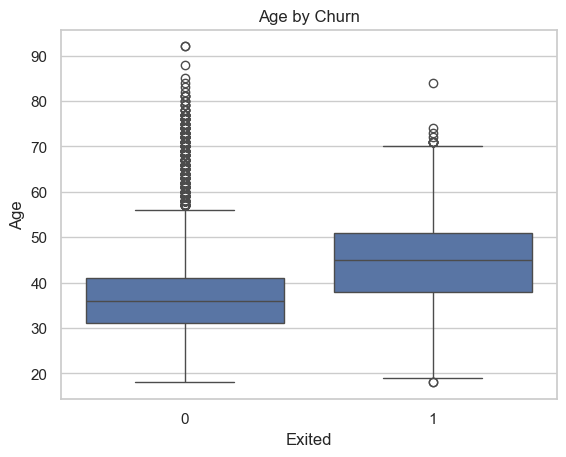

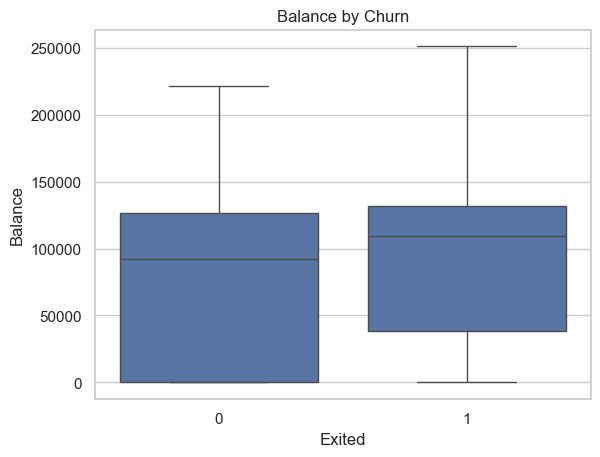

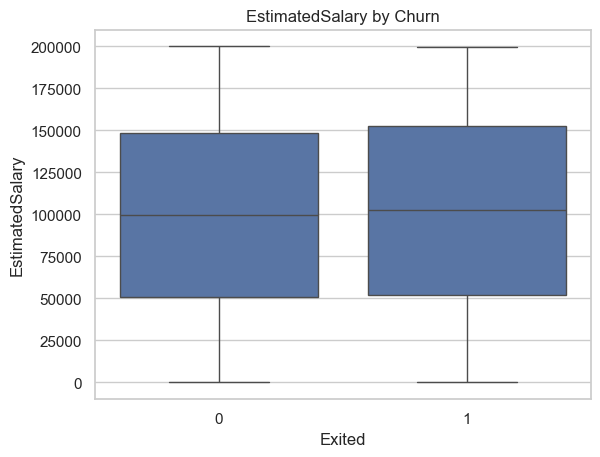

In [8]:
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in features:
    sns.boxplot(x = 'Exited', y = col, data = df)
    plt.title(f'{col} by Churn')
    plt.show()

## 2. Encode Categorical Values such as geography and gender

We will convert categorical columns:
- `Geography` (France, Germany, Spain)
- `Gender` (Male, Female)

...into numeric values using **one-hot encoding** with `pd.get_dummies()`.


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## 3. Train and Evaluate Classification Model

We will:
- Separate features and labels
- Split the data into training/testing sets
- Train and evaluate:
  - Logistic Regression
  - Decision Tree Classifier

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_preds))
print("Confusion Matrix: \n", confusion_matrix(y_test, log_preds))

Logistic Regression Accuracy:  0.814
Confusion Matrix: 
 [[1547   60]
 [ 312   81]]


C:\Users\Others\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))

Decision Tree Accuracy: 0.7805
Confusion Matrix:
 [[1362  245]
 [ 194  199]]


## Analyze feature importance to understand what influences churn

We'll analyze which features were most important in the **Decision Tree** model.
This helps the bank understand **why customers churn**.


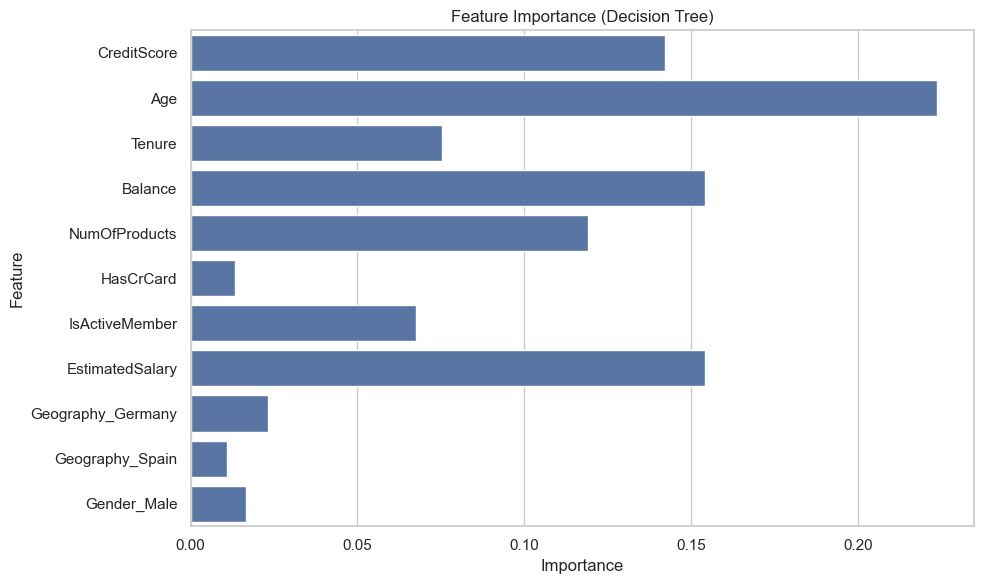

In [26]:
importances = tree_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Conclusion

- The dataset was successfully cleaned and encoded.
- Two classification models were trained and evaluated:
  - Logistic Regression
  - Decision Tree Classifier
- Accuracy and confusion matrices were used to assess performance.
- The most influential features for churn were:
  - **Age**
  - **Balance**
  - **EstimatedSalary**
  - **CreditScore**

These insights can help the bank design targeted customer retention strategies.
